<a href="https://colab.research.google.com/github/nizardbsk/pythorch-tutorial/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [7]:
#Create a Model class that iherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower)
  #-->hiddine layer1( number of neurons)
  #-->h2(n)
  #-->output( 3 classes of flowers)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x




In [8]:
# Pick a manual seed for a randomization
torch.manual_seed(41)
# create an instance of model
model=Model()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)


In [11]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [12]:
my_df['variety']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [13]:
# Change the last column from strings to entigers
my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)

In [14]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [15]:
# Train test split! set x, y
X = my_df.drop('variety', axis=1)
Y=my_df['variety']

In [16]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: variety, Length: 150, dtype: float64

In [18]:
# Convert X,Y to numpy arrays
X=X.values
Y=Y.values

In [19]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
from sklearn.model_selection import train_test_split
import torch

In [21]:
# Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=41)

In [22]:
X_train

array([[5.7, 2.6, 3.5, 1. ],
       [6.5, 2.8, 4.6, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [5.5, 2.6, 4.4, 1.2],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 5.4, 2.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [5.2, 4.1, 1.5, 0.1],
       [6.5, 3. , 5.8, 2.2],
       [6.3, 3.4, 5.6, 2.4],
       [5.7, 3.8, 1.7, 0.3],
       [6.7, 2.5, 5.8, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3. , 1.4, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.8, 2.7, 3.9, 1.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.1, 1.5, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [4.9, 2.4, 3.3, 1. ],
       [6.2, 3

In [23]:
# Convert X features to float tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [29]:
# Convert X labels to tensors long
Y_train=torch.LongTensor(Y_train)
Y_test=torch.LongTensor(Y_test)

In [25]:
#Set the criterion of model to measure the error,how far off the prediction are from the data
criterion = nn.CrossEntropyLoss()
# Choose an optimizer, lr = learning rate
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


In [26]:
# Train our model
# Epochs? (one run through the training data in our network)
epochs=100
losses=[]
for i in range(epochs):
  # Go forward and get a prediction
  Y_pred=model.forward(X_train) # Get predicted results
  # measure the loss ,gonna be high at first
  loss=criterion(Y_pred,Y_train) # predicted value vs the y_train
  #Keep track of our losses
  losses.append(loss.detach().numpy())
  # print every 10 epochs
  if i%10 == 0:
    print(f'Epoch : {i} ,and loss : {loss}')
  # Do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch : 0 ,and loss : 1.125203251838684
Epoch : 10 ,and loss : 1.0097211599349976
Epoch : 20 ,and loss : 0.816234827041626
Epoch : 30 ,and loss : 0.585993230342865
Epoch : 40 ,and loss : 0.4003390371799469
Epoch : 50 ,and loss : 0.2679472267627716
Epoch : 60 ,and loss : 0.17963498830795288
Epoch : 70 ,and loss : 0.12165627628564835
Epoch : 80 ,and loss : 0.08606518805027008
Epoch : 90 ,and loss : 0.06522618979215622


Text(0.5, 0, 'Epochs')

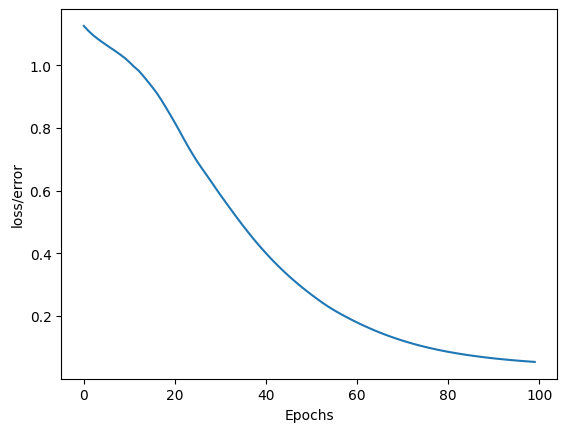

In [27]:
# graph it out
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")

In [30]:
# Evaluate Model on test data set
with torch.no_grad(): # turn off back propagation
    Y_eval=model.forward(X_test) #X_test are features from our test set and Y_eval will be predictions
    loss = criterion(Y_eval,Y_test) # find the error

In [31]:
loss

tensor(0.1315)

In [37]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    Y_val=model.forward(data)
    # will tell us what type of flower our network think it is
    print(f'{i+1}.) {str(Y_val)}  \t {Y_test[i]} \t {Y_val.argmax().item()} ')
    # Correct or not
    if Y_val.argmax().item() == Y_test[i]:
      correct+=1
  print(f'we got {correct} correct')

1.) tensor([-5.8771,  4.4629,  6.5155])  	 2 	 2 
2.) tensor([-7.5451,  4.1668,  9.7293])  	 2 	 2 
3.) tensor([-8.4517,  5.1275, 10.2015])  	 2 	 2 
4.) tensor([-4.3411,  5.6280,  2.5636])  	 1 	 1 
5.) tensor([-7.1838,  4.8757,  8.3023])  	 2 	 2 
6.) tensor([-3.3940,  5.3421,  1.2802])  	 1 	 1 
7.) tensor([-5.9240,  4.9826,  6.0025])  	 2 	 2 
8.) tensor([-4.2895,  5.7016,  2.3920])  	 1 	 1 
9.) tensor([-6.5369,  4.9261,  7.1291])  	 2 	 2 
10.) tensor([-8.0526,  4.4129, 10.3325])  	 2 	 2 
11.) tensor([-5.6775,  4.9505,  5.6248])  	 2 	 2 
12.) tensor([ 4.5748, -2.2579, -2.8925])  	 0 	 0 
13.) tensor([ 4.2646, -2.0055, -2.7342])  	 0 	 0 
14.) tensor([-2.1081,  4.0482,  0.5803])  	 1 	 1 
15.) tensor([ 3.4608, -1.2147, -2.3488])  	 0 	 0 
16.) tensor([-5.4739,  5.1174,  5.0966])  	 2 	 1 
17.) tensor([ 4.0637, -1.8045, -2.6504])  	 0 	 0 
18.) tensor([-5.8090,  4.6057,  6.2494])  	 1 	 2 
19.) tensor([ 4.9250, -2.5763, -3.0545])  	 0 	 0 
20.) tensor([ 3.4559, -1.2559, -2.3637])

In [38]:
new_irs=torch.tensor([4.7,3.2,1.3,0.2])

In [39]:
with torch.no_grad():
  print(model(new_irs))


tensor([ 4.5445, -2.2478, -2.8698])


In [40]:
newer_irs=torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
  print(model(newer_irs))

tensor([-5.9960,  4.5080,  6.6831])


In [41]:
# save our NN model
torch.save(model.state_dict(),'my_iris_model.pt')

In [42]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))


<All keys matched successfully>

In [43]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)